## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
## 8219 Rows and 4 columns

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
gdp_df.drop('Value Footnotes',axis=1, inplace=True)

In [12]:
gdp_df=gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
grouped_count=gdp_df.groupby('Country')['Year'].count()
print(grouped_count)

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64


In [15]:
 yearcounts = gdp_df.groupby(['Country'])['Year'].count()
yearcounts = yearcounts.reset_index()

In [16]:
yearcounts[(yearcounts.Year > 33)]

,Country,Year
1,Africa Eastern and Southern,34
2,Africa Western and Central,34
3,Albania,34
4,Algeria,34
5,Andorra,34
...,...,...
240,Vanuatu,34
241,Viet Nam,34
244,World,34
245,Zambia,34


In [17]:
## 7a = 228 Countries have full years

In [18]:
yearcounts[(yearcounts.Year <= 33)]

,Country,Year
0,Afghanistan,24
23,Bhutan,33
37,Cayman Islands,18
48,CuraÃ§ao,24
54,Djibouti,11
73,Faroe Islands,16
83,Greenland,32
115,Kosovo,16
125,Lebanon,33
152,Montenegro,27


In [19]:
## 7b Cayman Islands, Djibuti , Snt Maarten (Dutch Part), Turks and Caicos Islands

In [20]:
## 7c The countries that are missing years are newer?

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

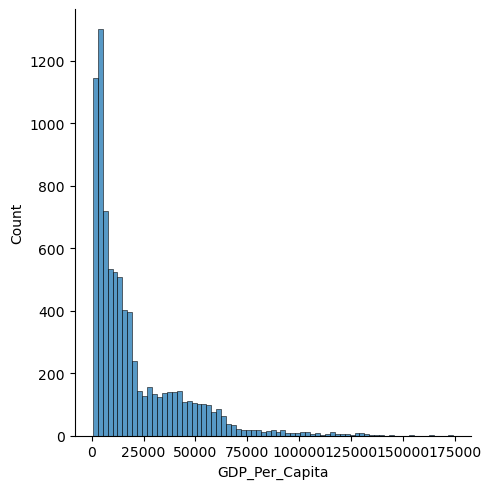

In [22]:
sns.displot(data=gdp_df,x='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

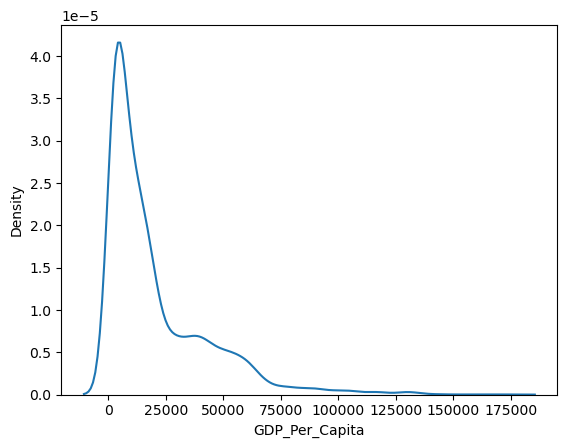

In [23]:
sns.kdeplot(gdp_df['GDP_Per_Capita'])

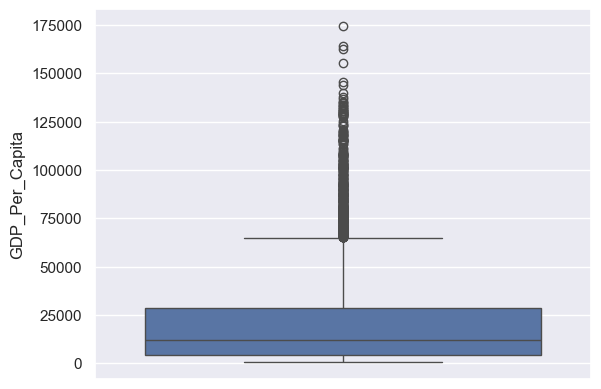

In [24]:
sns.set_theme(style="darkgrid")
sns.boxplot(y=gdp_df["GDP_Per_Capita"])
plt.show()

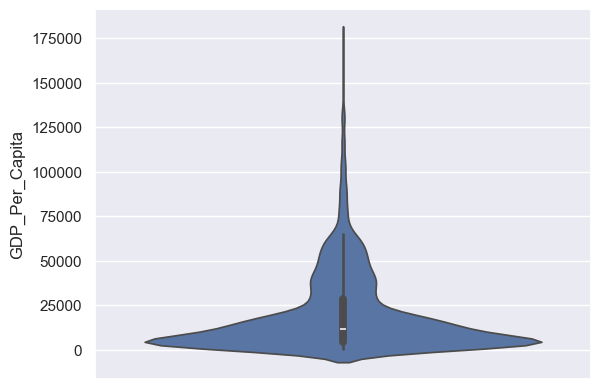

In [25]:
sns.violinplot(y=gdp_df["GDP_Per_Capita"])
plt.show()

9. What was the median GDP per capita value in 2020?

In [27]:
median_gdp_2020 = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'].median()
print(median_gdp_2020)

15309.23598817024


In [28]:
# 15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [30]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
print(gdp_decades.head())

                        Country  Year  GDP_Per_Capita
3                   Afghanistan  2020     2769.685745
13                  Afghanistan  2010     2848.586061
23                  Afghanistan  2000     1617.826475
27  Africa Eastern and Southern  2020     3861.111238
37  Africa Eastern and Southern  2010     3863.836012


<Axes: title={'center': 'GDP_Per_Capita'}, xlabel='Year'>

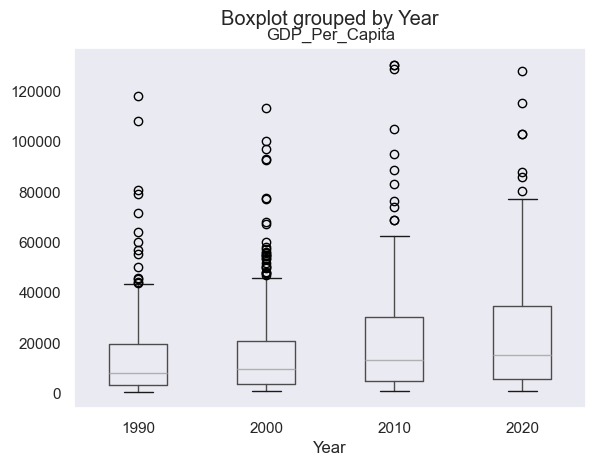

In [31]:
gdp_decades.boxplot(by='Year', column = ['GDP_Per_Capita'], grid = False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

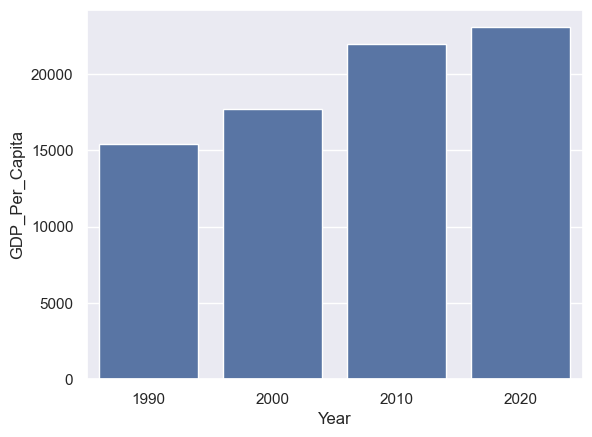

In [32]:
sns.barplot(
    x='Year',
    y='GDP_Per_Capita',
    data=gdp_decades,
    errorbar=None)

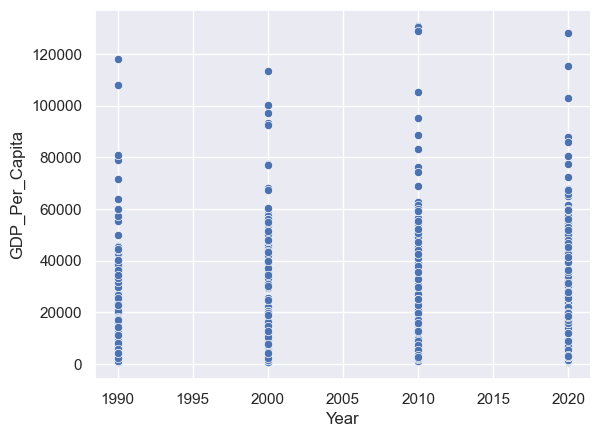

In [33]:
sns.scatterplot(data=gdp_decades,
                x='Year',
                y='GDP_Per_Capita')
plt.show()

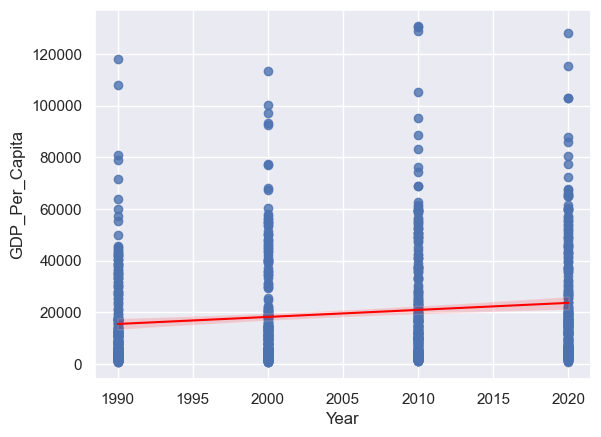

In [34]:
sns.regplot(
    x=gdp_decades['Year'],
    y=gdp_decades['GDP_Per_Capita'],
    line_kws={'color':'red','linewidth':1.5}
)
plt.show()

In [35]:
## GDP has gone up over time

11. Which country was the first to have a GDP per capita greater than $100,000?

In [37]:
gdp_df.loc[gdp_df['GDP_Per_Capita']>=100000].index[0]

750

In [38]:
gdp_df.loc[750]

Country                 Bermuda
Year                       2011
GDP_Per_Capita    101174.504104
Name: 750, dtype: object

In [39]:
## Bermuda, 2011 

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [41]:
gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'].max()

128256.5603407562

In [42]:
gdp_df[gdp_df['GDP_Per_Capita'] == 128256.5603407562]

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


In [43]:
## Luxembourg 

In [44]:
luxembourg = gdp_df[gdp_df['Country'] == 'Luxembourg']
print(luxembourg.head())

         Country  Year  GDP_Per_Capita
4423  Luxembourg  2023   130373.477942
4424  Luxembourg  2022   134507.667531
4425  Luxembourg  2021   135379.291201
4426  Luxembourg  2020   128256.560341
4427  Luxembourg  2019   131609.099616


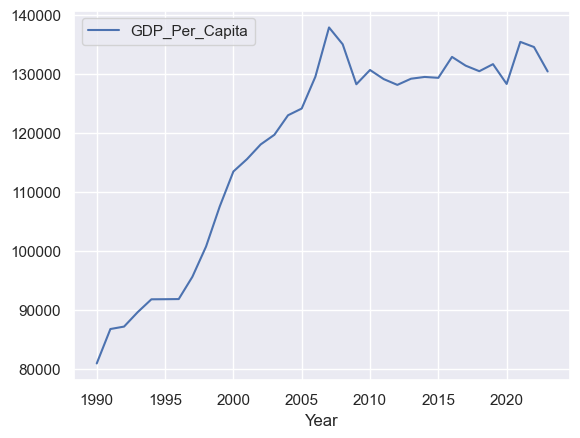

In [45]:
luxembourg.plot(x='Year',
                y='GDP_Per_Capita',
                kind='line')
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [47]:
gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'].min()

833.9202574580189

In [48]:
gdp_df[gdp_df['GDP_Per_Capita'] == 833.9202574580189]

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


In [49]:
burundi = gdp_df[gdp_df['Country'] == 'Burundi']
print(burundi.head())

      Country  Year  GDP_Per_Capita
1043  Burundi  2023      828.861074
1044  Burundi  2022      829.387160
1045  Burundi  2021      836.665571
1046  Burundi  2020      833.920257
1047  Burundi  2019      855.732720


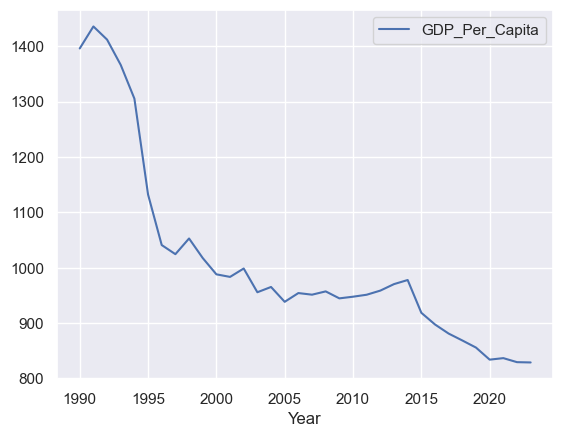

In [50]:
burundi.plot(x='Year',
                y='GDP_Per_Capita',
                kind='line')
plt.show()

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [114]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip', skipfooter=297, engine='python')
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [116]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [120]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [122]:
internet_df.drop('Value Footnotes',axis=1, inplace=True)

In [124]:
internet_df=internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?

In [132]:
group = internet_df.groupby(['Year'])['Country'].count()
print(group)

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Country, dtype: int64


In [134]:
## The early 90's seem to be missing some data...

17. What is the first year to have a non-zero internet users percentage value?

In [161]:
filtered_internet_df = internet_df.query('Internet_Users_Pct > 0')

In [163]:
filtered_internet_df.groupby(['Year'])['Internet_Users_Pct'].min()

Year
1990     0.001007
1991     0.000052
1992     0.000111
1993     0.000169
1994     0.000138
1995     0.000018
1996     0.000108
1997     0.000211
1998     0.000413
1999     0.000152
2000     0.005902
2001     0.000289
2002     0.000426
2003     0.024064
2004     0.024337
2005     0.065239
2006     0.182048
2007     0.217128
2008     0.220000
2009     0.220000
2010     0.250000
2011     0.700000
2012     0.800000
2013     0.900000
2014     0.990000
2015     1.083730
2016     1.177120
2017     2.004050
2018     4.000000
2019     6.100000
2020     7.400000
2021     9.642410
2022    11.275000
2023    44.502700
Name: Internet_Users_Pct, dtype: float64

In [165]:
## 2015

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [183]:
internet_2000_df = internet_df[internet_df['Year'] == 2000]
internet_2000_df.head()

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400


In [185]:
internet_2014_df = internet_df[internet_df['Year'] == 2014]
internet_2014_df.head()

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623


<Axes: xlabel='Internet_Users_Pct', ylabel='Count'>

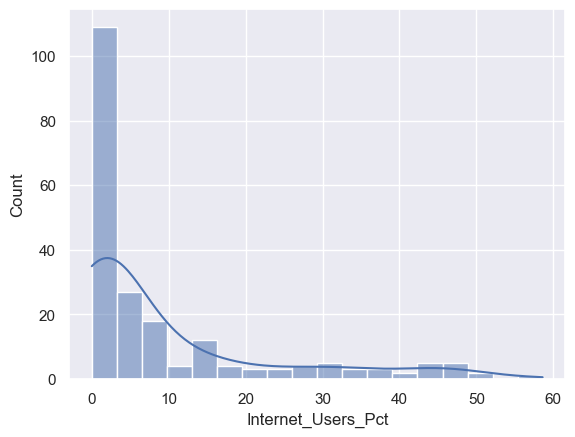

In [193]:
sns.histplot(data=internet_2000_df,
             x='Internet_Users_Pct',
            kde=True)

<Axes: xlabel='Internet_Users_Pct', ylabel='Count'>

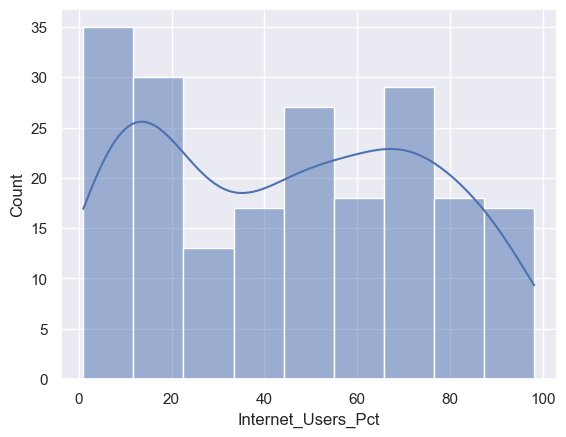

In [191]:
sns.histplot(data=internet_2014_df,
             x='Internet_Users_Pct',
            kde=True)

In [195]:
## It was a lot more spread out in 2014 than it was in 2000

19. For how many countries was the percentage of internet users below 5% in 2014?

In [198]:
less_than_5_df = internet_df.query('Internet_Users_Pct < 5')
less_than_5_df.head()

,Country,Year,Internet_Users_Pct
9,Afghanistan,2010,4.00000
10,Afghanistan,2009,3.55000
11,Afghanistan,2008,1.84000
12,Afghanistan,2007,1.90000
13,Afghanistan,2006,2.10712


In [200]:
less_than_5_2014 = less_than_5_df[less_than_5_df['Year'] == 2014]
print(less_than_5_2014)

                               Country  Year  Internet_Users_Pct
873                            Burundi  2014             1.04239
1033          Central African Republic  2014             2.70000
1061                              Chad  2014             2.90000
1517  Democratic Republic of the Congo  2014             3.00000
1782                           Eritrea  2014             0.99000
2451                     Guinea-Bissau  2014             3.32000
3364                        Madagascar  2014             3.70000
4073                             Niger  2014             1.24868
5055                           Somalia  2014             1.63000
5116                       South Sudan  2014             2.60000


In [202]:
## 10 Countries

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [213]:
gdp_and_internet_use = pd.concat([gdp_df,internet_df], ignore_index=False)

In [215]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [217]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6078,Zimbabwe,1997,NaN,0.033080
6079,Zimbabwe,1996,NaN,0.016790
6080,Zimbabwe,1995,NaN,0.007684
6081,Zimbabwe,1994,NaN,0.001739
6082,Zimbabwe,1990,NaN,0.000000


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?